<a href="https://colab.research.google.com/github/angiegh2002/nlp_hw/blob/main/DU2425S1-NLP_HW1_BY_-your_name-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[إنجي غبيس - دانا كلش ]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://huggingface.co/datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification

Cloning into 'Arabic_Dialect_Identification'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33 (from 1)
Unpacking objects: 100% (33/33), 6.47 KiB | 662.00 KiB/s, done.


In [4]:
!git clone https://github.com/angiegh2002/nlp_hw

Cloning into 'nlp_hw'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 58 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 8.35 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (16/16), done.


<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [13]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import  wordpunct_tokenize
from nltk import FreqDist, bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper
from wordcloud import WordCloud
import regex
from itertools import tee


In [12]:
!pip install python-bidi
!pip install arabic_reshaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 4.8 MB/s eta 0:00:00


Load data

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:

قم بوضع الخلايا الأربع التالية لحل كل طلب</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [ ]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# مهمة 01  : تحميل البيانات

## [1.1]

In [14]:
MADAR_dir="/content/nlp_hw/MADAR_Corpus"
MADAR_file_path=[os.path.join(MADAR_dir,filename) for filename in os.listdir(MADAR_dir) if filename.endswith(".tsv")]
df = [pd.read_csv(Mfilepath, sep='\t') for Mfilepath in MADAR_file_path ]
MADAR_df=pd.concat(df)
MADAR_df=MADAR_df.drop_duplicates().dropna()
has_nan=MADAR_df.isnull().sum().any()

In [15]:
MADAR_trian_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-train'] ,MADAR_df[MADAR_df['split'] == 'corpus-6-train']])
MADAR_vaild_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-dev'],MADAR_df[MADAR_df['split'] == 'corpus-6-dev']])
MADAR_test_df= MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-test']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(MADAR_df),len(MADAR_trian_df),len(MADAR_vaild_df),len(MADAR_test_df)))

number of samples : 112000 
number of trian samples : 95600 
number of vaild samples : 11200
number of test samples :5200


In [16]:
MADAR_df.head(10)

,sentID.BTEC,split,lang,sent
0,5,corpus-6-test-corpus-26-train,JED,شوفه هناك، قدام مكتب المعلومات السياحية بالضبط.
1,9,corpus-6-test-corpus-26-train,JED,ماقد سمعت بدا العنوان هنا.
2,11,corpus-6-test-corpus-26-train,JED,امشي سيدا لين ما تلاقي الصيدلية.
3,26,corpus-6-test-corpus-26-train,JED,بكم الفطور؟
4,27,corpus-6-test-corpus-26-train,JED,كيف أقدر اساعدك؟
5,30,corpus-6-test-corpus-26-train,JED,روح يسار عند الزواية الثالثة.
6,50,corpus-6-test-corpus-26-train,JED,تبا كريم وسكر في قهوتك؟
7,64,corpus-6-test-corpus-26-train,JED,ممكن تعطيني كاش للشيك دا الميتين دولار؟
8,74,corpus-6-test-corpus-26-train,JED,اذا لازم يظهر، اتصل عليا لو سمحت.
9,86,corpus-6-test-corpus-26-train,JED,فين المقهى؟


In [39]:
QADI_dir="/content/Arabic_Dialect_Identification/data"
file_labels = [ "test","trian","valid"]
QADI_file_path=[os.path.join(QADI_dir,filename) for filename in os.listdir(QADI_dir) if filename.endswith(".parquet")]
frames = [pd.read_parquet(Qfilepath).assign(split=label) for Qfilepath, label in zip(QADI_file_path, file_labels)]
QADI_df=pd.concat(frames)
label_mapping = {
    0: 'OM', 1: 'SD', 2: 'SA', 3: 'KW', 4: 'QA', 5: 'LB',
    6: 'JO', 7: 'SY', 8: 'IQ', 9: 'MA', 10: 'EG',
    11: 'PL', 12: 'YE', 13: 'BH', 14: 'DZ', 15: 'AE',
    16: 'TN', 17: 'LY'
}
QADI_df['label'] = QADI_df['label'].map(label_mapping)
QADI_df=QADI_df.drop_duplicates().dropna()
has_nan=QADI_df.isnull().sum().any()


In [40]:
QADI_trian_df=QADI_df[QADI_df['split'] == 'trian']
QADI_test_df=QADI_df[QADI_df['split'] == 'test']
QADI_vaild_df=QADI_df[QADI_df['split'] == 'valid']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(QADI_df),len(QADI_trian_df),len(QADI_vaild_df),len(QADI_test_df)))

number of samples : 458197 
number of trian samples : 440052 
number of vaild samples : 8981
number of test samples :9164


In [41]:
QADI_df.head(10)

,id,label,text,split
0,910595516496515200,KW,@A_E_92 استاذ عبدالعزيز صارله الموضوع سنه يعن...,test
1,847921262752129024,JO,#كذبة_نيسان كل عام والكذاب بألف خير 🙈😂 https:/...,test
2,1138977052055560192,EG,@basitooo5 طمطم عاااتى طبق جبنة 🙄,test
3,978901748604645376,AE,@alsyasiyeh @alsyaaf يمكن متلاحقين السوق بيشتر...,test
4,838068478179430400,KW,@A_A_AlTammar عيل المدرب حمار حشاك .. مالها حل...,test
5,1180570878192562176,DZ,@X_NISOU @ALGtrend @bina_bilaa @Ss68Sarah @Ena...,test
6,1125837506077970432,BH,الهُم انك عفو كريم تُحب العفو فأعفُ عنا ..,test
7,1133104152131694592,JO,@emsamiira الحلو بكل الي بصير معك من مصايب لس...,test
8,1107380111664398336,LB,هذا ما قالته كلودين عون عن صحّة الرئيس https:/...,test
9,1153151641333509888,LB,@AZAL84 @BassamAbouZeid @MokhtarGhazzawi هي شب...,test


## [1.2]

In [42]:
class_criteria_df=pd.read_csv("/content/nlp_hw/dialect_name_unification.csv")
class_criteria_df = class_criteria_df.drop(labels = ["Unnamed: 0"], axis = 1)
class_criteria_df=class_criteria_df.drop(index=[0,1],axis=0)
class_criteria_df.head()

,Region,Unnamed: 2,Unnamed: 3,Country,Unnamed: 5,Unnamed: 6,City,Unnamed: 8
2,Maghreb,المغاربية,MA,Morocco,المغرب,RAB,Rabat,الرباط
3,Maghreb,المغاربية,MA,Morocco,المغرب,FES,Fes,فاس
4,Maghreb,المغاربية,DZ,Algeria,الجزائر,ALG,Algiers,الجزائر
5,Maghreb,المغاربية,DZ,Algeria,الجزائر,ANB,Annaba,عنابة
6,Maghreb,المغاربية,TN,Tunisia,تونس,TUN,Tunis,تونس


In [43]:
MADAR_df_merged=MADAR_df.merge(class_criteria_df,left_on="lang",right_on="Unnamed: 6",how="left")
MADAR_df_merged = MADAR_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City"], axis = 1)
MADAR_df_merged.rename(columns={"Unnamed: 5" :"Country","Unnamed: 8" :"City","Unnamed: 2" :"Region"},inplace=True)
MADAR_df_merged=MADAR_df_merged.drop_duplicates().dropna()
has_nan=MADAR_df_merged.isna().any().any()
# MADAR_df_merged.to_csv("dd.csv",index=False)
print("number of samples :",len(MADAR_df_merged))
# MADAR_df_merged.head(10)

number of samples : 112000


In [44]:
QADI_df_merged=QADI_df.merge(class_criteria_df,left_on="label",right_on="Unnamed: 3",how="left")
QADI_df_merged = QADI_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City","Unnamed: 8"], axis = 1)
QADI_df_merged.rename(columns={"text" :"sent","Unnamed: 5" :"Country","Unnamed: 2" :"Region"},inplace=True)

QADI_df_merged=QADI_df_merged.drop_duplicates().dropna()
has_nan=QADI_df_merged.isna().any().any()
print("number of samples :",len(QADI_df_merged))
# QADI_df_merged.head(10)

number of samples : 458197


## [1.3]

In [45]:
excluded_columns = ['sentID.BTEC',"lang"]
excluded_columns1 = ['id','label']
MADAR_df_filtered = MADAR_df_merged.drop(columns=excluded_columns, errors='ignore')
QADI_df__filtered = QADI_df_merged.drop(columns=excluded_columns1, errors='ignore')
data_df = pd.concat([MADAR_df_filtered, QADI_df__filtered], ignore_index=True)

In [46]:
data_trian_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-train'] ,data_df[data_df['split'] == 'corpus-6-train'],data_df[data_df['split'] == 'trian']])
data_vaild_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-dev'],data_df[data_df['split'] == 'corpus-6-dev'],data_df[data_df['split'] == 'valid']])
data_test_df= pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-test'],data_df[data_df['split'] == 'test']])
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(data_df),len(data_trian_df),len(data_vaild_df),len(data_test_df)))

number of samples : 570197 
number of trian samples : 535652 
number of vaild samples : 20181
number of test samples :14364


In [47]:
data_df.head(10)

,split,sent,Region,Country,City
0,corpus-6-test-corpus-26-train,شوفه هناك، قدام مكتب المعلومات السياحية بالضبط.,خليجي,السعودية,جدة
1,corpus-6-test-corpus-26-train,ماقد سمعت بدا العنوان هنا.,خليجي,السعودية,جدة
2,corpus-6-test-corpus-26-train,امشي سيدا لين ما تلاقي الصيدلية.,خليجي,السعودية,جدة
3,corpus-6-test-corpus-26-train,بكم الفطور؟,خليجي,السعودية,جدة
4,corpus-6-test-corpus-26-train,كيف أقدر اساعدك؟,خليجي,السعودية,جدة
5,corpus-6-test-corpus-26-train,روح يسار عند الزواية الثالثة.,خليجي,السعودية,جدة
6,corpus-6-test-corpus-26-train,تبا كريم وسكر في قهوتك؟,خليجي,السعودية,جدة
7,corpus-6-test-corpus-26-train,ممكن تعطيني كاش للشيك دا الميتين دولار؟,خليجي,السعودية,جدة
8,corpus-6-test-corpus-26-train,اذا لازم يظهر، اتصل عليا لو سمحت.,خليجي,السعودية,جدة
9,corpus-6-test-corpus-26-train,فين المقهى؟,خليجي,السعودية,جدة


# مهمة 02 : فهم وتحليل البيانات

EDA

## [2.1]


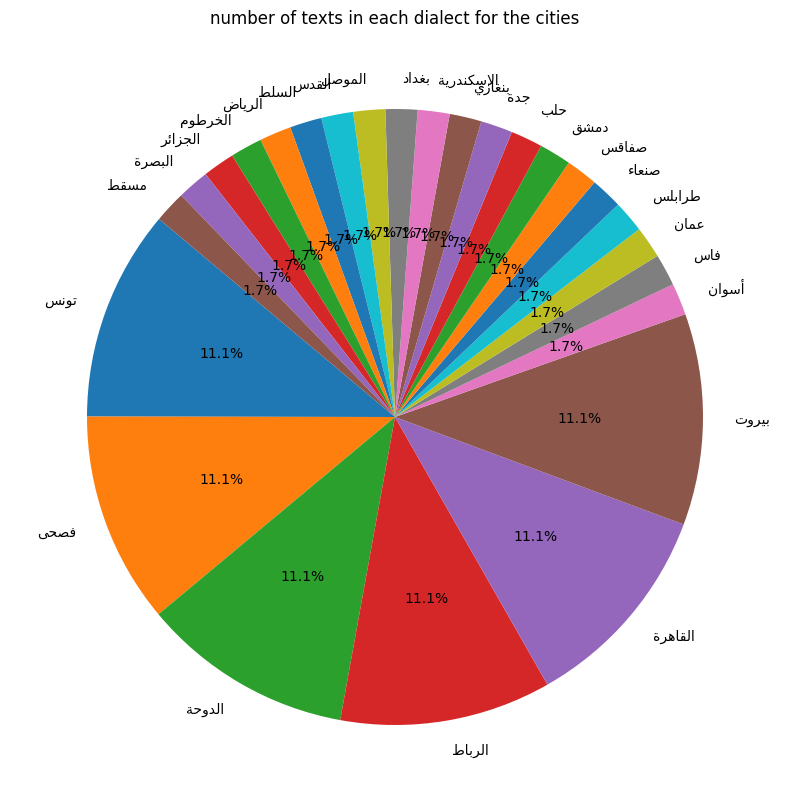

In [48]:
city_counts = data_trian_df.groupby('City')['sent'].count()
city_counts = city_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(city)) for city in city_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the cities")
plt.show()

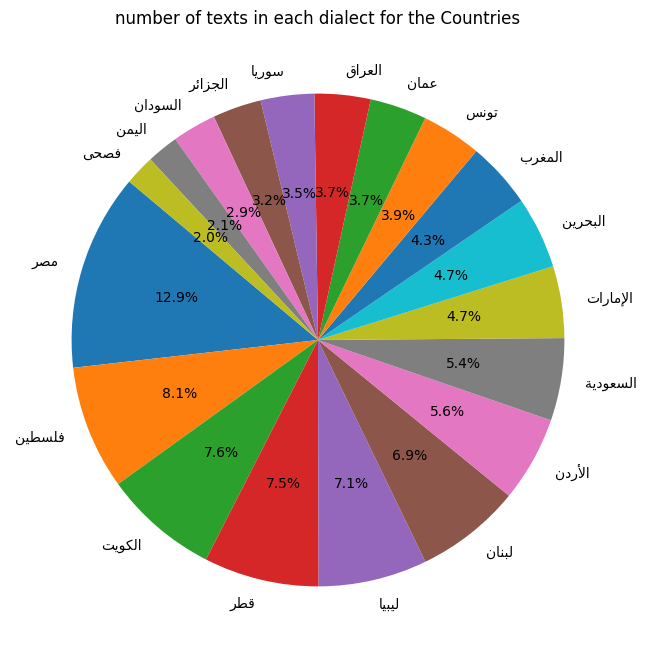

In [49]:
country_counts = data_trian_df.groupby('Country')['sent'].count()
country_counts = country_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(country)) for country in country_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Countries")
plt.show()

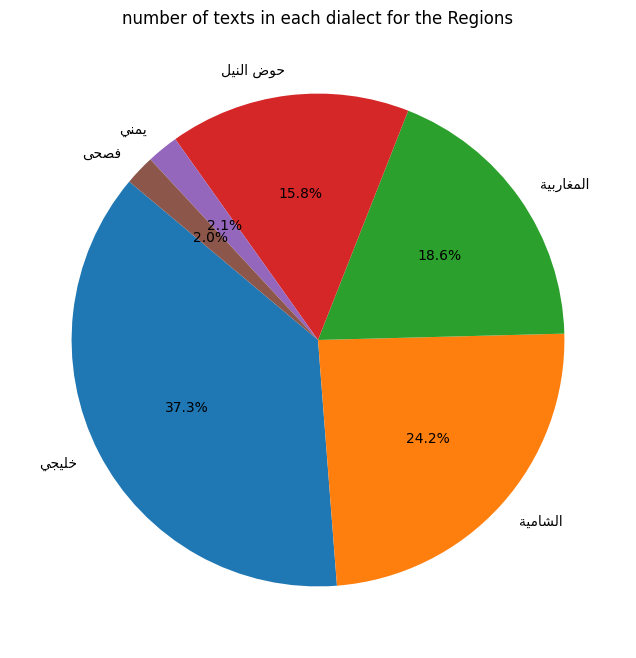

In [50]:
region_counts = data_trian_df.groupby('Region')['sent'].count()
region_counts = region_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Regions")
plt.show()

<div dir="rtl">
ملاحظات :<br>
حسب المناطق (regions):<br>
- المنطقة الخليجية (glof) تحتوي اكبر نسبة من النصوص في مجموعة البيانات 34.3% .<br>
-هناك نقص بالبيانات التي تمثل منطقة اليمني (yemen) في الداتا .<br>
-المنطقة المغربيّة ومنطقة حوض النيل لديها نسب متقاربة بعدد النصوص ضمن الداتا .<br>
حسب البلاد (countries):<br>
- بلد ليبيا هي الاكثر مساهمة بعدد النصوص ضمن المنطقة المغاربيية ،اما في منطقة حوض النيل فعد النصوص من بلد مصر هي الاكثر ،وفي المنطقة الشاميية تعد النصوص من اللبنان وفلسطين الاكثر عددا ،واخيرا في المنطقة الخليجية العدد الاكبر من النصوص يوجد في بلد الكويت وقطر .<br>
- بلد الجزائر وعمان يملكان عددا صغيرا من النصوص على الرغم من انتماءهم الى منطقتين بعدد نصوص كبير نسبيا .<br>
حسب المدن (cities) <br>
-النصوص ليست موزعة بالتساوي بين المدن حيث يوجد ٥ دول فقط بعدد نصوص اكبر اما بقية المدن فعدد النصوص فيها صغير .<br>
مما سبق وجدنا ان البيانات تظهر تركيزا في عدد قليل من المدن مما يشير الى توزع غير متساو .<br>
الاحظ ايضا ان البيانات في داتا مدار غير متوازنة فقد ظهر ذلك في تمثل عدد النصوص لكل مدينة بينما كان هناك توازن نوعا ما عند تمثيل عدد النصوص على  مستوى البلاد او المناطق حيث ان داتا كادي متوازنة نوعا ما لذلك عند اضافتها مع مدار قل عدم توازن البيانات بشكل ملحوظ  <br>
</div>

In [51]:
# city_counts1 = data_trian_df.groupby('City')['sent'].count()
# city_counts2 = data_trian_df.groupby('Country')['sent'].count()
# city_counts3 = data_trian_df.groupby('Region')['sent'].count()

# fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# axes[0].pie(city_counts1, labels=city_counts1.index, autopct='%1.1f%%', startangle=140)
# axes[0].set_title("number of texts in each dialect for the cities")

# axes[1].pie(city_counts2, labels=city_counts2.index, autopct='%1.1f%%', startangle=140)
# axes[1].set_title("number of texts in each dialect for the Countries")

# axes[2].pie(city_counts3, labels=city_counts3.index, autopct='%1.1f%%', startangle=140)
# axes[2].set_title("number of texts in each dialect for the Regions")
# plt.tight_layout()
# plt.show()

## [2.2]

In [52]:
def tokenize_arabic_only(text):
    tokens = wordpunct_tokenize(text)
    arabic_tokens = [token for token in tokens if regex.match(r"^\p{IsArabic}+$", token)]
    return arabic_tokens

data_trian_df['tokens'] = data_trian_df['sent'].apply(tokenize_arabic_only)

all_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))

print(f"عدد الكلمات الكلي (Total Tokens): {total_tokens}")
print(f"عدد الكلمات الفريدة (Vocab Tokens): {unique_tokens}")


عدد الكلمات الكلي (Total Tokens): 6308593
عدد الكلمات الفريدة (Vocab Tokens): 488355


In [53]:
data_trian_df.head()

,split,sent,Region,Country,City,tokens
0,corpus-6-test-corpus-26-train,شوفه هناك، قدام مكتب المعلومات السياحية بالضبط.,خليجي,السعودية,جدة,"[شوفه, هناك, قدام, مكتب, المعلومات, السياحية, ..."
1,corpus-6-test-corpus-26-train,ماقد سمعت بدا العنوان هنا.,خليجي,السعودية,جدة,"[ماقد, سمعت, بدا, العنوان, هنا]"
2,corpus-6-test-corpus-26-train,امشي سيدا لين ما تلاقي الصيدلية.,خليجي,السعودية,جدة,"[امشي, سيدا, لين, ما, تلاقي, الصيدلية]"
3,corpus-6-test-corpus-26-train,بكم الفطور؟,خليجي,السعودية,جدة,"[بكم, الفطور]"
4,corpus-6-test-corpus-26-train,كيف أقدر اساعدك؟,خليجي,السعودية,جدة,"[كيف, أقدر, اساعدك]"


## [2.3]

In [54]:
عظ

NameError: name 'عظ' is not defined

In [ ]:
data = ' '.join(all_tokens)

reshaped_text = arabic_reshaper.reshape(data)

processed_data = get_display(reshaped_text)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(processed_data)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:

# plt.figure(figsize=(20, 10))
# plt.title("WordCloud")
# plt.imshow(wordcloud)
# plt.axis("off")
# wordcloud_path = "wordcloud_output.png"
# plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')
# plt.show()
# print(f"تم حفظ الصورة في: {wordcloud_path}")


In [ ]:
img = plt.imread("wordcloud_output.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

## [2.4]

In [55]:


def get_most_common_words(tokens, n=10):
    """Return the n most common words."""
    word_freq = FreqDist(tokens)
    return word_freq.most_common(n)

def get_hapaxes(tokens, n=10):
    """Return the first n hapaxes (words that appear only once)."""
    word_freq = FreqDist(tokens)
    hapaxes = [word for word in word_freq.hapaxes()]
    return hapaxes[:n]

def get_most_common_bigrams(tokens, n=10):
    """Return the n most common bigrams."""
    bigram_freq = FreqDist(bigrams(tokens))
    return bigram_freq.most_common(n)

def get_most_common_trigrams(tokens, n=10):
    """Return the n most common trigrams."""
    trigram_freq = FreqDist(trigrams(tokens))
    return trigram_freq.most_common(n)

def get_most_important_bigrams(tokens, n=10):
    """Return the n most important bigrams using PMI."""
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    return bigram_finder.nbest(BigramAssocMeasures().pmi, n)

def get_most_important_trigrams(tokens, n=10):
    """Return the n most important trigrams using PMI."""
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    return trigram_finder.nbest(TrigramAssocMeasures().pmi, n)


In [56]:
def analyze_texts(dataframe, column='City', n=10):
    """Analyze texts and print results for each city."""
    city_tokens = {}

    # تجميع جميع النصوص لكل مدينة
    for index, row in dataframe.iterrows():
        label = row[column]
        tokens = row['tokens']
        if pd.isna(label):
            continue
        if label not in city_tokens:
            city_tokens[label] = []
        city_tokens[label].extend(tokens)

    # تحليل النصوص لكل مدينة
    for city, tokens in city_tokens.items():
        most_common = get_most_common_words(tokens, n)
        hapaxes = get_hapaxes(tokens, n)
        most_common_bigrams = get_most_common_bigrams(tokens, n)
        most_common_trigrams = get_most_common_trigrams(tokens, n)
        most_important_bigrams = get_most_important_bigrams(tokens, n)
        most_important_trigrams = get_most_important_trigrams(tokens, n)

        # طباعة النتائج لكل مدينة
        print(f"=== Results for {city} ===")
        print("Most Common Words: ", ', '.join([f"{word} ({count})" for word, count in most_common]))
        print("Hapaxes: ", ', '.join(hapaxes))
        print("Most Common Bigrams: ", ', '.join([f"{' '.join(bigram)} ({count})" for bigram, count in most_common_bigrams]))
        print("Most Common Trigrams: ", ', '.join([f"{' '.join(trigram)} ({count})" for trigram, count in most_common_trigrams]))
        print("Most Important Bigrams: ", ', '.join([' '.join(bigram) for bigram in most_important_bigrams]))
        print("Most Important Trigrams: ", ', '.join([' '.join(trigram) for trigram in most_important_trigrams]))
        print("=" * 50)


In [57]:
analyze_texts(data_trian_df)

=== Results for جدة ===
Most Common Words:  لو (196), سمحت (182), ممكن (152), في (131), أبا (131), من (111), دا (107), على (92), فيه (71), هنا (65)
Hapaxes:  شوفه, ماقد, سمعت, بدا, تلاقي, أقدر, الزواية, الثالثة, الميتين, اطفال
Most Common Bigrams:  لو سمحت (181), من هنا (21), فيه أي (18), فين اقدر (15), سمحت ممكن (12), قريب من (11), ممكن اخذ (10), احس اني (10), سمحت أبا (9), أي مكان (9)
Most Common Trigrams:  لو سمحت ممكن (12), قريب من هنا (10), لو سمحت أبا (9), لو سمحت فين (7), فين اقدر اشتري (6), لو سمحت أيش (6), لو سمحت كم (5), لو سمحت كيف (4), فيه أي مكان (4), لو سمحت انا (4)
Most Important Bigrams:  الحي الصيني, الدرجة الثانية, السلم الكهربائي, حديقة الحيوانات, علاج لالم, لوس انجلوس, وول ستريت, اربعة ايام, الفرق بين, اهي فاتورتك
Most Important Trigrams:  عنوان التواصل حقك, الخطوط الجوية اليابانية, اشتري ذكرى سنوية, إيه بي سي, اف اف اف, سنة الف وتسعمية, كاش ولا شحن, لف يمين عند, اشتري تذكرة مترو, بعدين لف يسار
=== Results for حلب ===
Most Common Words:  إذا (250), سمحت (207), بدي (

In [58]:
analyze_texts(data_trian_df,"Country")

=== Results for السعودية ===
Most Common Words:  من (6647), اللي (4787), الله (4582), في (4227), على (3585), و (3000), ما (2481), بس (1816), كل (1803), ولا (1650)
Hapaxes:  الزواية, للأيميل, صعوبات, اقترحلك, بسريرين, كدة, مجعد, تدفيه, أعز, والصحة
Most Common Bigrams:  لو سمحت (404), شاء الله (191), كل شي (167), صح الله (146), من اللي (131), صح لسانك (130), الله يبارك (125), في كل (118), حسبي الله (116), اكثر من (111)
Most Common Trigrams:  ان شاء الله (91), صح الله لسانك (87), أعجبني فيديو على (78), الله يبارك فيك (76), الله ونعم الوكيل (64), صح الله بدنك (52), خالد بن عمره (45), ما شاء الله (38), حسبي الله ونعم (36), ولاقوة الا بالله (31)
Most Important Bigrams:  آند كومباني, أسه رلك, ابشروا بالخساره, اصب بناظري, الآ شناط, الأيفون والهواوي, البالغين العاقلين, السوا والمفوتر, الصالحه الباره, اللئيم تمردا
Most Important Trigrams:  الآ شناط وسباح, الأيفون والهواوي والمساويك, السوا والمفوتر للانترنت, تلاته صبايصي زنقر, صبايصي زنقر كويكلي, كنتاكي تلاته صبايصي, لاصحاب السوا والمفوتر, منيل ب

In [59]:
analyze_texts(data_trian_df,"Region")

=== Results for خليجي ===
Most Common Words:  من (45509), ما (30935), اللي (28583), في (28481), الله (23956), و (22864), على (22603), بس (17581), كل (12447), يا (12134)
Hapaxes:  للأيميل, اقترحلك, تدفيه, يثقفو, معاية, سأيكو, سعأدتنا, التوجيهات, شراريب, حتدفعلي
Most Common Bigrams:  شاء الله (2048), لو سمحت (1935), كل شي (1337), ان شاء (1175), اكثر من (812), حسبي الله (797), الله يبارك (772), اللي ما (735), كل يوم (695), من اللي (695)
Most Common Trigrams:  ان شاء الله (1152), ما شاء الله (462), الله ونعم الوكيل (409), الله يبارك فيك (402), حسبي الله ونعم (300), إن شاء الله (208), من كثر ما (189), حسبي الله عليهم (158), جزاك الله خير (153), وان شاء الله (140)
Most Important Bigrams:  آذانك وأصفح, آلتفاصيل عإبر, أبناءناس وأسرمحترمه, أڪتآفه أرتڪي, ابجبر اكسور, اجوني وفتشوني, اخماس بسداس, اذبلته تصوبني, ازواجنا ومتعلقين, افترق مرقدي
Most Important Trigrams:  الجزيله المت عبه, السوا والمفوتر للانترنت, الكآيده والنآدره والأصيله, صبايصي زنقر كويكلي, محچية اجوني وفتشوني, معبوچ وكونهم فنشوها, م

## [2.5]

In [73]:
from collections import Counter

def find_distinctive_words(dataframe, column='City', threshold=10):
    dialect_words = {}
    all_words = set()
    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
    distinctive_words = {
        dialect: {
            word: count
            for word, count in dialect_words[dialect].items()
            if count ==1 and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }
        for dialect in dialect_words
    }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda x: x[1]))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nالكلمات المميزة في لهجة {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("لا توجد كلمات مميزة تتجاوز العتبة المحددة")

    return distinctive_words_sorted





In [70]:
from collections import Counter

def find_distinctive_words(dataframe, column='City', base_threshold=10,low_threshold=2):
    """
    يجد الكلمات المميزة لكل لهجة والتي تكرارها يتجاوز عتبة معينة مرتبة بحسب تكرارها.

    Args:
        dataframe: DataFrame يحتوي على البيانات.
        column: اسم العمود الذي يمثل اللهجات (City, Country, or Region).
        base_threshold: عتبة أساسية يتم تعديلها حسب حجم البيانات وتوازنها.

    Returns:
        distinctive_words_sorted: قاموس يحتوي على الكلمات المميزة لكل لهجة مرتبة حسب تكرارها.
    """
    dialect_words = {}
    all_words = set()
    dialect_sizes = {}  # لحفظ حجم البيانات لكل لهجة

    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
            dialect_sizes[dialect] = 0  # تهيئة حجم البيانات
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
        dialect_sizes[dialect] += len(tokens)  # تحديث حجم البيانات

    distinctive_words = {}
    for dialect in dialect_words:
        # حساب العتبة الديناميكية
        threshold = base_threshold + int(dialect_sizes[dialect] / 1000)

        # استخدام عتبة منخفضة للمدن ذات عدد نصوص قليل
        if dialect_sizes[dialect] < int(0.017 * len(dataframe)):
            threshold = low_threshold

        distinctive_words[dialect] = {
            word: count
            for word, count in dialect_words[dialect].items()
            if count > threshold and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nالكلمات المميزة في لهجة {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("لا توجد كلمات مميزة تتجاوز العتبة المحددة")

    return distinctive_words_sorted

In [74]:
c=find_distinctive_words(data_trian_df)


الكلمات المميزة في لهجة جدة:
للأيميل (1), اقترحلك (1), اية (1), والصحة (1), يثقفو (1), معاية (1), سأيكو (1), سعأدتنا (1), مداني (1), شراريب (1), يسال (1), للصياغة (1), حيناسب (1), يمدينا (1), ببقشيش (1), يزيل (1), فأتتني (1), رأيحة (1), خأيس (1), يعفطهم (1), والليموزينات (1), الهواوية (1), كلامنا (1), خليي (1), تعلمي (1), يلاقو (1), اسوعيا (1), حنجهزه (1), حتزوج (1), حوصل (1), وحمشي (1), حلا (1), هههههه (1), غلأية (1), ايزومية (1), ختومات (1), بسلك (1), فرشة (1), جآيين (1), أيسكريم (1), بالبسكوت (1), تصيري (1), وقرب (1), سأيتو (1), يعفن (1), يعرفوا (1), كلمتها (1), الميلادي (1), الصدم (1), مخرزة (1), وسأدتي (1), لابسينا (1), يباهم (1), حتجيك (1), حرسلها (1), حتشيك (1), ندق (1), ملزمين (1), بالمشكلة (1), نسلها (1), فلة (1), احطي (1), المقعدة (1), عشاني (1), فحاخذها (1), والتوا (1), مفصله (1), حجرب (1), تأيلندي (1), نقس (1), اثق (1), تعلمك (1), لدا (1), عالق (1), تشانل (1), يباله (1), كانها (1), حبلغ (1), والمناسبات (1), الجمب (1), للسفينة (1), فبحطه (1), انأناس (1), ماتبا (1), أجابة (1

In [ ]:
co=find_distinctive_words(data_trian_df,"Country")

In [ ]:
re=find_distinctive_words(data_trian_df,"Region")

## [2.6]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np

def analyze_dialect_similarity(dataframe, column='City'):
    # إعداد البيانات
    dataframe = dataframe.dropna(subset=[column])
    unique_dialects = dataframe[column].unique()

    # حساب الكلمات المميزة لكل لهجة
    distinctive_words = find_distinctive_words(dataframe, column=column, threshold=1)

    # إنشاء مصفوفة التشابه
    similarity_matrix = np.zeros((len(unique_dialects), len(unique_dialects)))

    for i, dialect1 in enumerate(unique_dialects):
        for j, dialect2 in enumerate(unique_dialects):
            if i == j:
                similarity_matrix[i, j] = 1.0
            else:
                words1 = set(distinctive_words.get(dialect1, {}).keys())
                words2 = set(distinctive_words.get(dialect2, {}).keys())
                if words1 and words2:
                    similarity_matrix[i, j] = len(words1 & words2) / len(words1 | words2)
                else:
                    similarity_matrix[i, j] = 0.0

    # إنشاء خريطة الحرارة
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        similarity_matrix,
        xticklabels=unique_dialects,
        yticklabels=unique_dialects,
        cmap='coolwarm',
        annot=True,
        fmt=".2f"
    )
    plt.title("تشابه الكلمات بين اللهجات")
    plt.xlabel("اللهجة")
    plt.ylabel("اللهجة")
    plt.show()

    # ملاحظات إضافية
    print("\nملاحظات:")
    for i, dialect1 in enumerate(unique_dialects):
        similar_dialects = [
            (unique_dialects[j], similarity_matrix[i, j])
            for j in range(len(unique_dialects)) if i != j and similarity_matrix[i, j] > 0.5
        ]
        if similar_dialects:
            print(f"اللهجة {dialect1} تتشابه بشكل كبير مع: {', '.join([f'{d[0]} ({d[1]:.2f})' for d in similar_dialects])}")
        else:
            print(f"اللهجة {dialect1} ليس لها تشابه كبير مع اللهجات الأخرى.")




In [ ]:

analyze_dialect_similarity(data_trian_df, column='City')

## [2.7]

# مهمة 03 : تنظيف وتوحيد النص

normalization and cleaning Text

## [3.1]


## [3.2]

## [3.3]

## [3.4]

# مهمة 04  : بناء النموذج المرجعي

Model Baseline

## [4.1]


## [4.2]

## [4.3]

## [4.4]

## [4.5]

## [4.6]

# مهمة 05 : التدريب باستخدام نماذج التعلم العميق

Deep learning

The Comparison Dictionary example

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove links")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

## [5.2]

### [5.2.1]

### [5.2.2]

### [5.2.3]

## [5.3]

## [5.4]

## [5.5]

## [5.6]

# مهمة 06 : التمثيل الداللي

Semantic representation

## [6.1]

## [6.2]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)